In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
from collections import defaultdict
%matplotlib inline

In [2]:
def my_datetime(dt):
    return datetime.datetime.strptime(dt ,'%m/%d/%Y %H:%M:%S')

def my_weekday(dt): 
    return my_datetime(dt).weekday()

In [3]:
def setup_frame(df):
    df['LOCATION'] = tuple((zip(df['C/A'], df.UNIT, df.SCP, df.STATION)))
    df['SUPER_LOCATION'] = df['LOCATION'].apply(lambda x: (x[0], x[1], x[3]))
    df['EXITS_CUM'] = df['EXITS                                                               ']
    df['ENTRIES_CUM'] = df['ENTRIES']
    df['ENTRIES'] = df['ENTRIES_CUM'].shift(-1) - df['ENTRIES_CUM']
    df['EXITS'] = df['EXITS_CUM'].shift(-1) - df['EXITS_CUM']
    df['DATETIME'] =  df['DATE'] + ' ' + df['TIME']
    df['DAY_OF_WEEK'] = df['DATETIME'].apply(my_weekday)
    df.ENTRIES[(df.ENTRIES < 0)] = np.nan
    df.ENTRIES[(df.ENTRIES > 10000)] = np.nan
    df.EXITS[(df.EXITS < 0)] = np.nan
    df.EXITS[(df.EXITS > 10000)] = np.nan
    return df

In [4]:
def get_dict_by_location(df):
    '''Takes locationized DataFrame, returns the answer to Challenge 1'''
    by_location = defaultdict(list)
    for i, location in enumerate(df.LOCATION):
        by_location[location].append(list(df.iloc[i, 4:11]))
    return by_location

In [5]:
def get_dict_date_entries(df):
    '''Takes locationized DataFrame, returns the answer to Challenge 2'''
    date_entries_dict = defaultdict(list)
    for i, location in enumerate(df.LOCATION):
        date_entries_dict[location].append([my_other_datetime(df.iloc[i, 12]), df.iloc[i, 10]])
    return date_entries_dict

In [6]:
def plot_location(df, loc):
    '''Plots answer for challenge 4'''
    series = get_dict_series(df)[loc]
    x, y = zip(*series)
    x = [datetime.datetime.strptime(x_i, '%m/%d/%Y') for x_i in x]
    plt.figure(figsize=(10,7))
    plt.bar(x, y)

In [7]:
def get_dict_series(df):
    '''Takes locationized DataFrame, returns time series'''
    gb = df.groupby(['LOCATION','DATE']).sum()
    series_for_loc = {}
    for location in df.LOCATION.unique():
        f = gb.loc[location].reset_index()
        series_for_loc[location] = list(zip(f.DATE, f.ENTRIES))
    return series_for_loc

In [8]:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_170916.txt")

In [9]:
df = setup_frame(df)

/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '

In [10]:
challenge_1 = get_dict_by_location(df)
challenge_1[('A002', 'R051', '02-00-00', '59 ST')][:15]

[['NQR456W', 'BMT', '09/09/2017', '00:00:00', 'REGULAR', 26.0, 2138544],
 ['NQR456W', 'BMT', '09/09/2017', '04:00:00', 'REGULAR', 17.0, 2138549],
 ['NQR456W', 'BMT', '09/09/2017', '08:00:00', 'REGULAR', 80.0, 2138584],
 ['NQR456W', 'BMT', '09/09/2017', '12:00:00', 'REGULAR', 227.0, 2138669],
 ['NQR456W', 'BMT', '09/09/2017', '16:00:00', 'REGULAR', 279.0, 2138731],
 ['NQR456W', 'BMT', '09/09/2017', '20:00:00', 'REGULAR', 142.0, 2138779],
 ['NQR456W', 'BMT', '09/10/2017', '00:00:00', 'REGULAR', 16.0, 2138801],
 ['NQR456W', 'BMT', '09/10/2017', '04:00:00', 'REGULAR', 12.0, 2138805],
 ['NQR456W', 'BMT', '09/10/2017', '08:00:00', 'REGULAR', 98.0, 2138821],
 ['NQR456W', 'BMT', '09/10/2017', '12:00:00', 'REGULAR', 186.0, 2138889],
 ['NQR456W', 'BMT', '09/10/2017', '16:00:00', 'REGULAR', 198.0, 2138937],
 ['NQR456W', 'BMT', '09/10/2017', '20:00:00', 'REGULAR', 117.0, 2138980],
 ['NQR456W', 'BMT', '09/11/2017', '00:00:00', 'REGULAR', 20.0, 2138996],
 ['NQR456W', 'BMT', '09/11/2017', '04:00:00',

In [11]:
challenge_2 = get_dict_series(df)
challenge_2[('A002', 'R051', '02-00-00', '59 ST')]

[('09/09/2017', 771.0),
 ('09/10/2017', 627.0),
 ('09/11/2017', 1761.0),
 ('09/12/2017', 1725.0),
 ('09/13/2017', 1545.0),
 ('09/14/2017', 1631.0),
 ('09/15/2017', 1298.0)]

In [12]:
challenge_3 = df.groupby(['LOCATION', 'DATE']).sum().reset_index()
challenge_3 = challenge_3[['LOCATION', 'DATE', 'ENTRIES']]
challenge_3.head(10)

,LOCATION,DATE,ENTRIES
0,"(A002, R051, 02-00-00, 59 ST)",09/09/2017,771.0
1,"(A002, R051, 02-00-00, 59 ST)",09/10/2017,627.0
2,"(A002, R051, 02-00-00, 59 ST)",09/11/2017,1761.0
3,"(A002, R051, 02-00-00, 59 ST)",09/12/2017,1725.0
4,"(A002, R051, 02-00-00, 59 ST)",09/13/2017,1545.0
5,"(A002, R051, 02-00-00, 59 ST)",09/14/2017,1631.0
6,"(A002, R051, 02-00-00, 59 ST)",09/15/2017,1298.0
7,"(A002, R051, 02-00-01, 59 ST)",09/09/2017,626.0
8,"(A002, R051, 02-00-01, 59 ST)",09/10/2017,376.0
9,"(A002, R051, 02-00-01, 59 ST)",09/11/2017,745.0


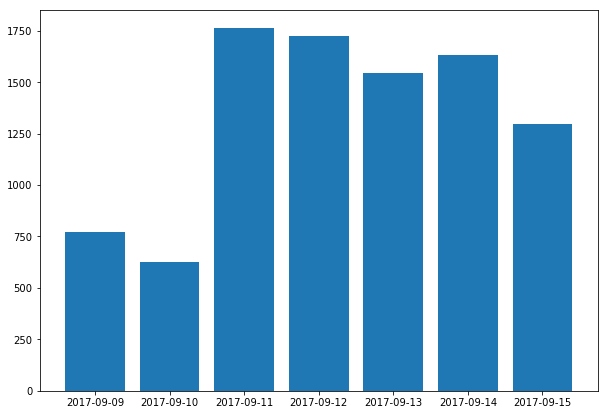

In [13]:
#Challenge 4
plot_location(df, ('A002', 'R051', '02-00-00', '59 ST'))

In [14]:
challenge_5 = df.groupby(['SUPER_LOCATION', 'DATE']).sum().reset_index()
challenge_5 = challenge_5[['SUPER_LOCATION', 'DATE', 'ENTRIES']]
challenge_5.head(10)

,SUPER_LOCATION,DATE,ENTRIES
0,"(A002, R051, 59 ST)",09/09/2017,7745.0
1,"(A002, R051, 59 ST)",09/10/2017,6116.0
2,"(A002, R051, 59 ST)",09/11/2017,13525.0
3,"(A002, R051, 59 ST)",09/12/2017,14036.0
4,"(A002, R051, 59 ST)",09/13/2017,14034.0
5,"(A002, R051, 59 ST)",09/14/2017,15764.0
6,"(A002, R051, 59 ST)",09/15/2017,11789.0
7,"(A006, R079, 5 AV/59 ST)",09/09/2017,6632.0
8,"(A006, R079, 5 AV/59 ST)",09/10/2017,5384.0
9,"(A006, R079, 5 AV/59 ST)",09/11/2017,11820.0


In [15]:
challenge_6 = {}
station_gb = df.groupby(['STATION', 'DATE']).sum().reset_index()
for s in station_gb.STATION.unique():
    f = station_gb[station_gb.STATION == s]
    challenge_6[s] = list(zip(f.DATE, f.ENTRIES))
challenge_6['59 ST']  


[('09/09/2017', 41290.0),
 ('09/10/2017', 30537.0),
 ('09/11/2017', 71255.0),
 ('09/12/2017', 74989.0),
 ('09/13/2017', 75545.0),
 ('09/14/2017', 80766.0),
 ('09/15/2017', 65704.0)]

<Container object of 7 artists>

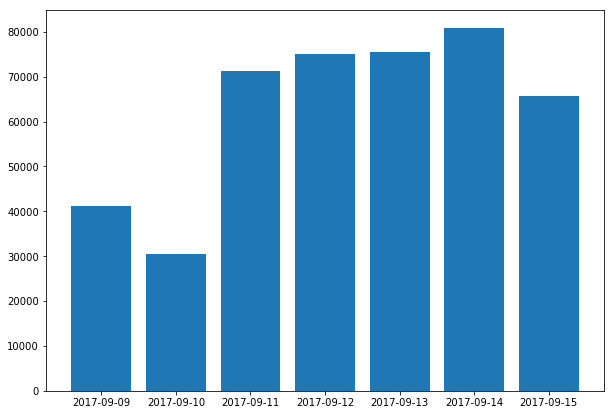

In [16]:
#Challenge 7
x, y = zip(*challenge_6['59 ST'])
x = [datetime.datetime.strptime(x_i, '%m/%d/%Y') for x_i in x]
plt.figure(figsize=(10,7))
plt.bar(x, y)

In [17]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        f = pd.read_csv(file_url)
        f['WEEK_NUM'] = week_num
        dfs.append(f)
    return pd.concat(dfs)

In [18]:
week_nums = ['170916', '170909', '170902', '170826', '170819', '170812']
turnstiles_df = get_data(week_nums)

In [19]:
f = turnstiles_df.copy(deep=True)

In [20]:
f['EXITS_CUM'] = f['EXITS                                                               ']
f['ENTRIES_CUM'] = f['ENTRIES']
f['ENTRIES'] = f['ENTRIES_CUM'].shift(-1) - f['ENTRIES_CUM']
f['EXITS'] = f['EXITS_CUM'].shift(-1) - f['EXITS_CUM']
f['DATETIME'] =  f['DATE'] + ' ' + f['TIME']
f['DAY_OF_WEEK'] = f['DATETIME'].apply(my_weekday)
f.ENTRIES[(f.ENTRIES < 0)] = np.nan
f.ENTRIES[(f.ENTRIES > 10000)] = np.nan
f.EXITS[(f.EXITS < 0)] = np.nan
f.EXITS[(f.EXITS > 10000)] = np.nan


/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyW

In [21]:
g = f.groupby(['DATE', 'DAY_OF_WEEK', 'STATION','WEEK_NUM']).sum().reset_index()[['DATE', 'DAY_OF_WEEK', 'STATION', 'ENTRIES','WEEK_NUM']]

In [22]:
challenge_8 = defaultdict(list)
for s in g.STATION.unique():
    for w in g.WEEK_NUM.unique():
        temp = g[g.STATION == s]
        temp = temp[g.WEEK_NUM == w]
        challenge_8[s].append(list(zip(temp.DAY_OF_WEEK, temp.ENTRIES)))
    

/Users/home/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [23]:
challenge_8['59 ST']

[[(5, 38305.0),
  (6, 31894.0),
  (0, 65566.0),
  (1, 73058.0),
  (2, 73529.0),
  (3, 72804.0),
  (4, 61717.0)],
 [(5, 37121.0),
  (6, 29765.0),
  (0, 67938.0),
  (1, 71742.0),
  (2, 72568.0),
  (3, 71766.0),
  (4, 56975.0)],
 [(5, 41776.0),
  (6, 32361.0),
  (0, 63113.0),
  (1, 67567.0),
  (2, 69994.0),
  (3, 69327.0),
  (4, 59005.0)],
 [(5, 39328.0),
  (6, 30178.0),
  (0, 66305.0),
  (1, 67208.0),
  (2, 68906.0),
  (3, 68630.0),
  (4, 56855.0)],
 [(5, 34092.0),
  (6, 28062.0),
  (0, 30701.0),
  (1, 68843.0),
  (2, 71991.0),
  (3, 76187.0),
  (4, 67210.0)],
 [(5, 41290.0),
  (6, 30537.0),
  (0, 71255.0),
  (1, 74989.0),
  (2, 75545.0),
  (3, 80766.0),
  (4, 65704.0)]]

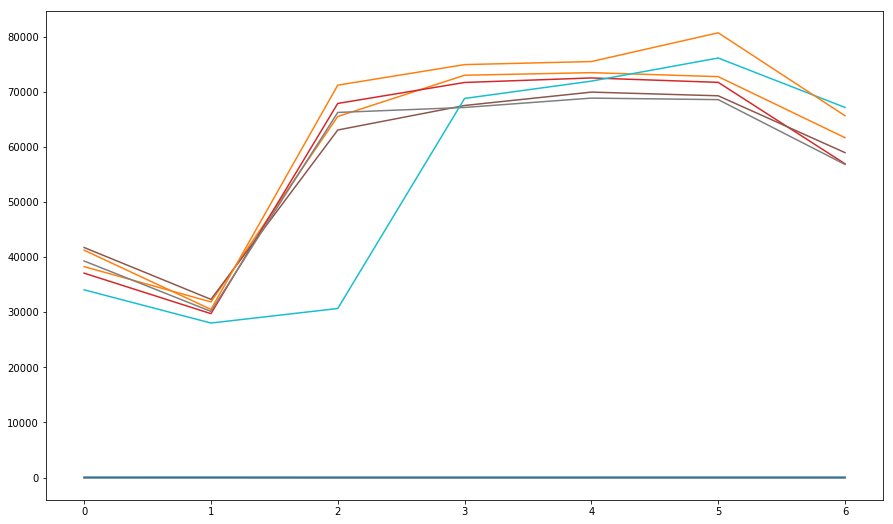

In [24]:
plt.figure(figsize = (15, 9))
for week_count_list in challenge_8['59 ST']:
    plt.plot(week_count_list)

In [25]:
challenge_9 = f.groupby(['STATION']).sum().reset_index()[['STATION', 'ENTRIES']].sort_values('ENTRIES',ascending=False)
challenge_9.head(10)

,STATION,ENTRIES
61,34 ST-PENN STA,5409728.0
232,GRD CNTRL-42 ST,4823488.0
59,34 ST-HERALD SQ,3849922.0
46,23 ST,3707142.0
14,14 ST-UNION SQ,3697997.0
353,TIMES SQ-42 ST,3573314.0
225,FULTON ST,3220263.0
68,42 ST-PORT AUTH,3199005.0
110,86 ST,2884762.0
9,125 ST,2611959.0


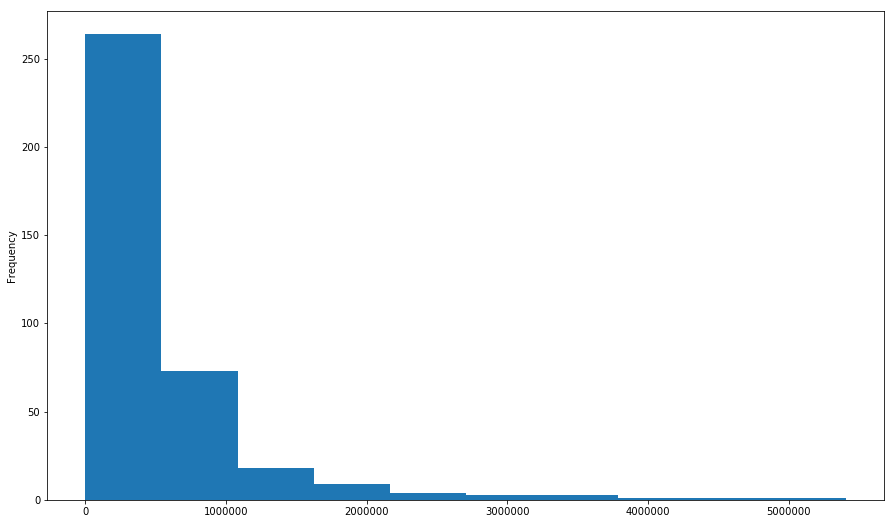

In [26]:
#Challenge 10
challenge_9.ENTRIES.plot(kind='hist', figsize = (15,9))